In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
a1 = 0.3
b1 = 0.3
a2 = 0.7
b2 = 0.7
a3 = 1
b3 = 1

In [3]:
step = 0.025
t = np.linspace(0, 2*np.pi, int(2*np.pi/step), endpoint=True)

In [4]:
def f(a, t):
    return a*np.cos(t)

def g(b, t):
    return b*np.sin(t)

In [5]:
x1 = f(a1, t)
y1 = g(b1, t)
x2= f(a2, t)
y2= g(b2, t)
x3= f(a3, t)
y3= g(b3, t)

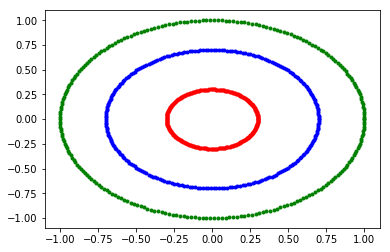

In [6]:
plt.plot(x1, y1, '.r')
plt.plot(x2, y2, '.b')
plt.plot(x3, y3, '.g')
plt.show()

In [38]:
df1 = pd.DataFrame({'x' : x1, 'y' : y1, 'target' : 0})
df2 = pd.DataFrame({'x' : x2, 'y' : y2, 'target' : 1})
df3 = pd.DataFrame({'x' : x3, 'y' : y3, 'target' : 2})

In [56]:
def split_df(df):
    x_train, x_test = train_test_split(df, test_size=0.3, shuffle=True, random_state=21)
    x_valid, x_test = train_test_split(x_test, test_size=0.3, shuffle=True, random_state=14)
    return x_train, x_valid, x_test

In [57]:
from keras.models import Sequential
from keras.layers import Dense

In [336]:
model = Sequential()
model.add(Dense(20, input_dim=2, activation='tanh'))
model.add(Dense(3, activation='tanh'))
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [337]:
train = []
valid = []
test = []

for df in (df1, df2 ,df3):
    tr, v, te = split_df(df)
    train.append(tr)
    valid.append(v)
    test.append(te)
train = pd.concat(train)
valid = pd.concat(valid)
test = pd.concat(test)

In [338]:
y = pd.get_dummies(train['target'])
model.fit(train.iloc[:, :-1], y, epochs=100, shuffle=True)

Epoch 1/100
525/525 [==============================] - 1s 2ms/step - loss: 0.3749 - acc: 0.3314
Epoch 2/100
525/525 [==============================] - 0s 24us/step - loss: 0.3303 - acc: 0.3276
Epoch 3/100
525/525 [==============================] - 0s 28us/step - loss: 0.2996 - acc: 0.3200
Epoch 4/100
525/525 [==============================] - 0s 28us/step - loss: 0.2786 - acc: 0.3124
Epoch 5/100
525/525 [==============================] - 0s 30us/step - loss: 0.2642 - acc: 0.3143
Epoch 6/100
525/525 [==============================] - 0s 26us/step - loss: 0.2541 - acc: 0.3162
Epoch 7/100
525/525 [==============================] - 0s 28us/step - loss: 0.2472 - acc: 0.3181
Epoch 8/100
525/525 [==============================] - 0s 30us/step - loss: 0.2424 - acc: 0.3181
Epoch 9/100
525/525 [==============================] - 0s 27us/step - loss: 0.2388 - acc: 0.3143
Epoch 10/100
525/525 [==============================] - 0s 28us/step - loss: 0.2362 - acc: 0.3219
Epoch 11/100
525/525 [========

525/525 [==============================] - 0s 25us/step - loss: 0.2198 - acc: 0.3162
Epoch 85/100
525/525 [==============================] - 0s 25us/step - loss: 0.2197 - acc: 0.3257
Epoch 86/100
525/525 [==============================] - 0s 27us/step - loss: 0.2197 - acc: 0.4229
Epoch 87/100
525/525 [==============================] - 0s 23us/step - loss: 0.2197 - acc: 0.4171
Epoch 88/100
525/525 [==============================] - 0s 27us/step - loss: 0.2196 - acc: 0.4514
Epoch 89/100
525/525 [==============================] - 0s 24us/step - loss: 0.2196 - acc: 0.3829
Epoch 90/100
525/525 [==============================] - 0s 24us/step - loss: 0.2195 - acc: 0.3238
Epoch 91/100
525/525 [==============================] - 0s 27us/step - loss: 0.2195 - acc: 0.3352
Epoch 92/100
525/525 [==============================] - 0s 24us/step - loss: 0.2195 - acc: 0.3505
Epoch 93/100
525/525 [==============================] - 0s 28us/step - loss: 0.2195 - acc: 0.3771
Epoch 94/100
525/525 [===========

In [331]:
p = model.predict_classes(train.iloc[:, :-1])

In [332]:
accuracy_score(train['target'], p)

0.4438095238095238

In [272]:
from sklearn.metrics import accuracy_score